#### Python Portfolio Project

In [108]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


#### **Create a visual showing the relationship between horsepower and fuel economy**

###### *The relational plot below displays an inverse relationship between horsepower and fuel economy: as mpg increases, horsepower decreases.* 
###### *This tells us that cars with better fuel economy (higher mpg) tend to have lower horsepower, and cars with bad fuel economy (lower mpg) tend to have higher horsepower.*

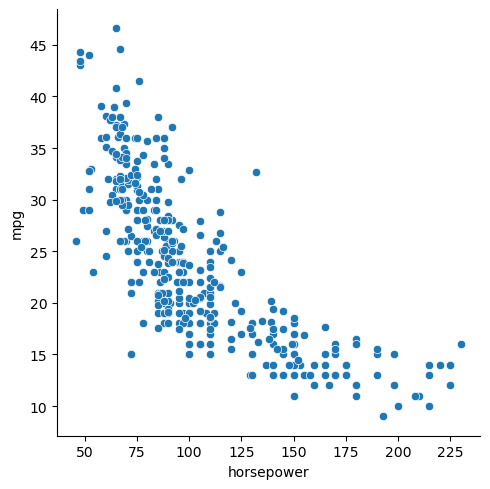

In [22]:
sns.relplot(data=mpg,x="horsepower",y="mpg")

#### **Create a table summarizing fuel economy by country of origin**

###### *The catplot below displays the average mpg of cars by their country of origin.* 
###### *Cars originating in Japan have the highest mpg at just over 30, and cars originating in the USA have the lowest mpg at about 20. Europe falls in the middle at around 27.5 mpg.*

C:\Users\ryan.connor\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ryan.connor\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


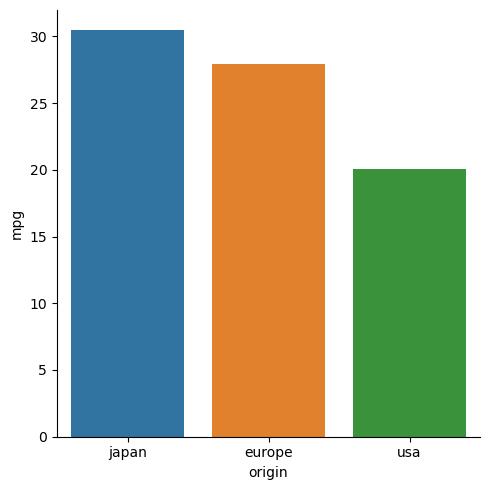

In [76]:
mean_mpg = mpg.groupby('origin')['mpg'].mean().sort_values(ascending=False)
mpg['origin'] = pd.Categorical(mpg['origin'], categories=mean_mpg.index, ordered=True)
sns.catplot(data=mpg, x="origin", y="mpg", kind="bar", errorbar=None)

#### **Create a visual showing how fuel economy has changed over time**

###### *The lineplot below displays the average mpg of cars by their model year from 1970 to 1982.*
###### *The year with the lowest average mpg was 1973, averaging less than 17.5 mpg. 1980 had the highest average mpg, just above 32.5.*
###### *Overall, the average fuel economy increased over time from 1970 to 1982.* 

C:\Users\ryan.connor\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ryan.connor\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Average MPG')

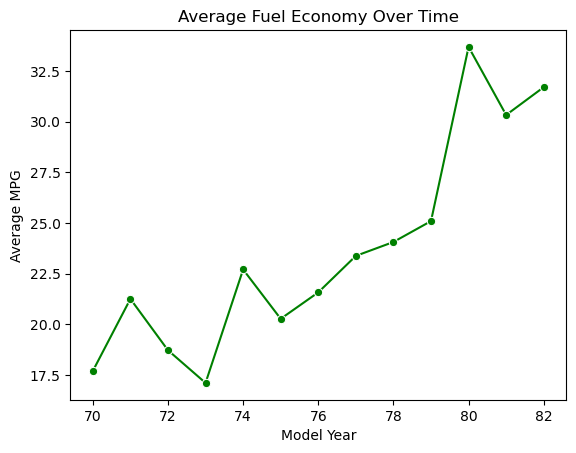

In [157]:
import matplotlib.pyplot as plt
mpg_by_year = mpg.groupby('model_year')['mpg'].mean().reset_index()
sns.lineplot(data=mpg_by_year, x='model_year', y='mpg', marker='o',color='green')
plt.title('Average Fuel Economy Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')

#### **Create two other visuals or tables related to fuel economy**

##### **Average fuel economy by car make**

###### *The bar graph below displays 10 notable car makes and their average mpg.*
###### *Nissan and Honda had the highest average mpg and were the only makes with average mpgs over 30.*
###### *The car makes with the lowest average mpgs include Chrysler, Ford, and Pontiac. These makes were the only car brands with less than or equal to 20 average mpg.*
###### *The 'Other' category includes makes such as Buick, AMC, Datsun, Peugeot and Volkswagen, to name a few.*

In [166]:
mpg.name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [218]:
import numpy as np

In [220]:
mpg['car_make'] = np.where(mpg.name.str.contains("ford", case=False, na=False), 'Ford',
                       np.where(mpg.name.str.contains("toyota", case=False, na=False), 'Toyota',
                                np.where(mpg.name.str.contains("dodge", case=False, na=False), 'Dodge', 
                                         np.where(mpg.name.str.contains("chevrolet", case=False, na=False), 'Chevrolet', 
                                                  np.where(mpg.name.str.contains("chrysler", case=False, na=False), 'Chrysler', 
                                                           np.where(mpg.name.str.contains("nissan", case=False, na=False), 'Nissan', 
                                                                    np.where(mpg.name.str.contains("honda", case=False, na=False), 'Honda',
                                                                             np.where(mpg.name.str.contains("audi", case=False, na=False), 'Audi',
                                                                                      np.where(mpg.name.str.contains("plymouth", case=False, na=False), 'Plymouth',
                                                                                               np.where(mpg.name.str.contains("pontiac", case=False, na=False), 'Pontiac', 'Other'))))))))))

C:\Users\ryan.connor\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ryan.connor\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


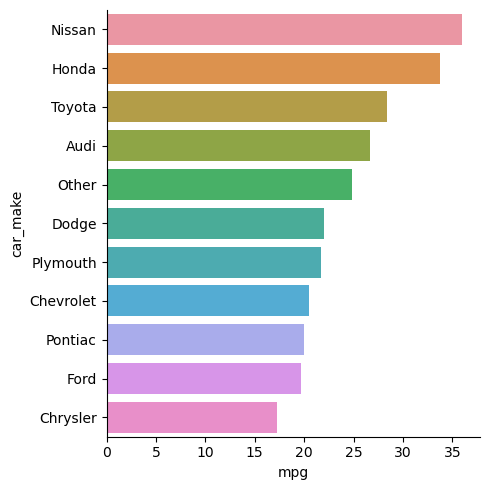

In [226]:
mean_mpg = mpg.groupby('car_make')['mpg'].mean().sort_values(ascending=False)
mpg['car_make'] = pd.Categorical(mpg['car_make'], categories=mean_mpg.index, ordered=True)
sns.catplot(data=mpg, x="mpg", y="car_make", kind="bar", errorbar=None)

##### **Average fuel economy by cylinders**

###### *The displot below displays the relationship between average fuel economy and the number of cylinders a car contains. Two notable insights that we can gather from this includes:*
###### *Almost all of the cars in the dataset contained an even number of cylinders, either 4, 6, or 8. Cars with 3 or 5 cylinders represented a very small percentage of the cars in the total set.*
###### *Secondly, as the number of cylinders increased, the average mpg decreased. As the KDE plot line displays below, cars with 4 cylinders peaked at an average mpg of about 26, while cars with 6 and 8 cylinders peaked at an average mpg of about 19 and 14, respectively.*
###### *Similar to the relationship between fuel economy and horsepower, fuel economy and number of cylinders share an inverse relationship where as one increases, the other decreases.*

C:\Users\ryan.connor\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


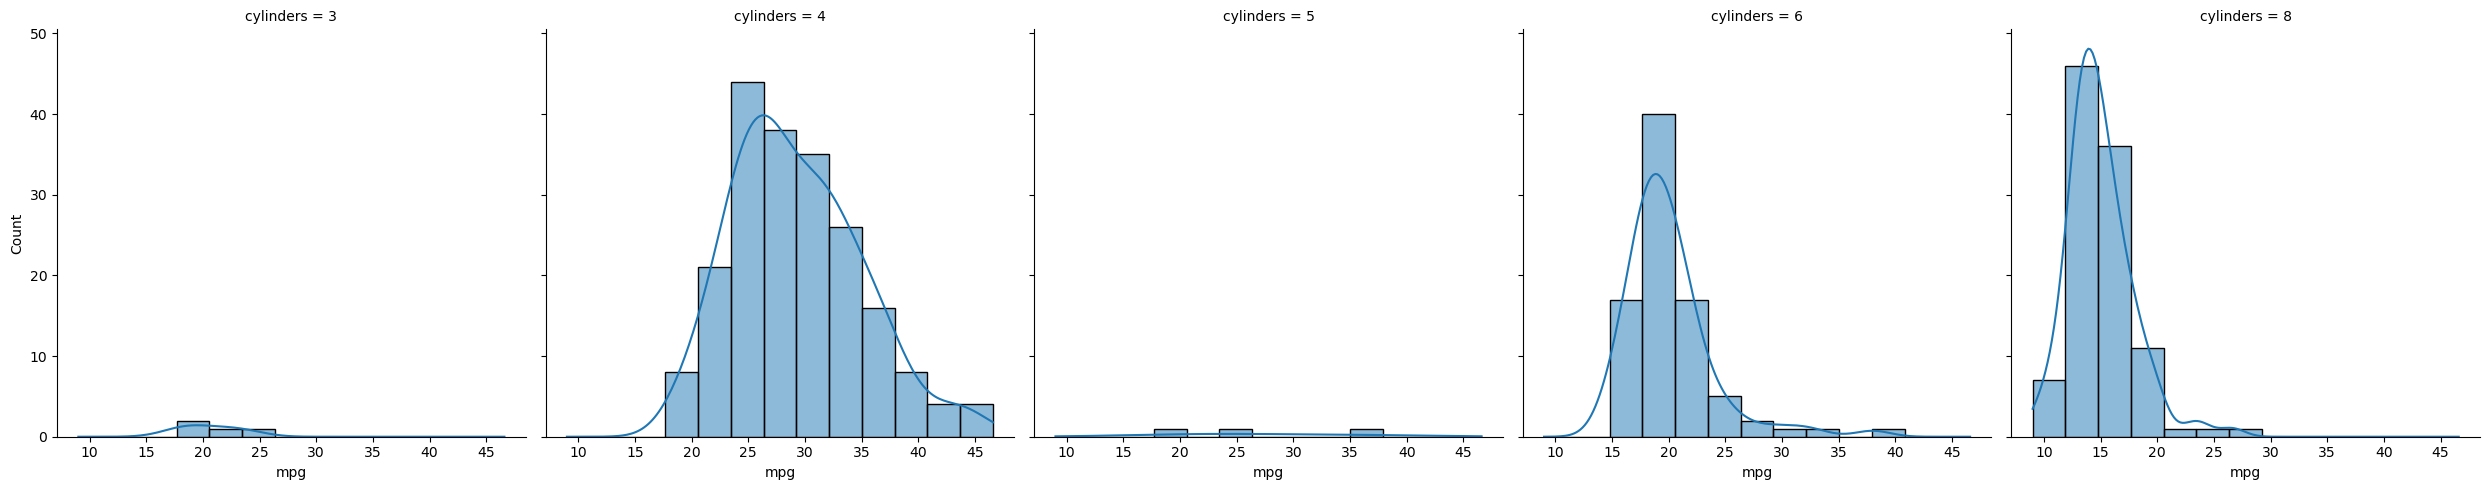

In [262]:
sns.displot(data=mpg, x="mpg", col="cylinders", kde=True)